# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
#from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd
import requests

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [2]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)
print("Status Code:", response.status_code)

Status Code: 200


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [3]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
# Extract all rows of data
table = soup.find('table')

column_names = []
data_rows = []

# Extract data rows
for row in table.find_all('tr'):
    if not column_names:
        # Extract column names from the first row
        for header_cell in row.find_all('th'):
            column_names.append(header_cell.text.strip())
    else:
        # Extract data from the subsequent rows
        row_data = []
        for cell in row.find_all('td'):
            row_data.append(cell.text.strip())
        if row_data:
            data_rows.append(row_data)
    
    df = pd.DataFrame(data_rows, columns=column_names)
    
    print(df)

Empty DataFrame
Columns: [id, terrestrial_date, sol, ls, month, min_temp, pressure]
Index: []
  id terrestrial_date sol   ls month min_temp pressure
0  2       2012-08-16  10  155     6    -75.0    739.0
   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       

     id terrestrial_date  sol   ls month min_temp pressure
0     2       2012-08-16   10  155     6    -75.0    739.0
1    13       2012-08-17   11  156     6    -76.0    740.0
2    24       2012-08-18   12  156     6    -76.0    741.0
3    35       2012-08-19   13  157     6    -74.0    732.0
4    46       2012-08-20   14  157     6    -74.0    740.0
..   ..              ...  ...  ...   ...      ...      ...
152  75       2013-01-23  166  250     9    -65.0    922.0
153  76       2013-01-24  167  250     9    -65.0    920.0
154  77       2013-01-25  168  251     9    -66.0    923.0
155  78       2013-01-26  169  252     9    -66.0    922.0
156  80       2013-01-27  170  252     9    -66.0    925.0

[157 rows x 7 columns]
     id terrestrial_date  sol   ls month min_temp pressure
0     2       2012-08-16   10  155     6    -75.0    739.0
1    13       2012-08-17   11  156     6    -76.0    740.0
2    24       2012-08-18   12  156     6    -76.0    741.0
3    35       2012-08-19   13  1

      id terrestrial_date  sol   ls month min_temp pressure
0      2       2012-08-16   10  155     6    -75.0    739.0
1     13       2012-08-17   11  156     6    -76.0    740.0
2     24       2012-08-18   12  156     6    -76.0    741.0
3     35       2012-08-19   13  157     6    -74.0    732.0
4     46       2012-08-20   14  157     6    -74.0    740.0
..   ...              ...  ...  ...   ...      ...      ...
302  316       2013-07-30  349  359    12    -75.0    852.0
303  318       2013-07-31  350  359    12    -76.0    853.0
304  320       2013-08-01  351    0     1    -75.0    853.0
305  319       2013-08-02  352    0     1    -77.0    854.0
306  323       2013-08-03  353    1     1    -75.0    855.0

[307 rows x 7 columns]
      id terrestrial_date  sol   ls month min_temp pressure
0      2       2012-08-16   10  155     6    -75.0    739.0
1     13       2012-08-17   11  156     6    -76.0    740.0
2     24       2012-08-18   12  156     6    -76.0    741.0
3     35       2

      id terrestrial_date  sol   ls month min_temp pressure
0      2       2012-08-16   10  155     6    -75.0    739.0
1     13       2012-08-17   11  156     6    -76.0    740.0
2     24       2012-08-18   12  156     6    -76.0    741.0
3     35       2012-08-19   13  157     6    -74.0    732.0
4     46       2012-08-20   14  157     6    -74.0    740.0
..   ...              ...  ...  ...   ...      ...      ...
504  528       2014-03-29  584  108     4    -82.0    804.0
505  527       2014-03-30  585  109     4    -83.0    802.0
506  529       2014-03-31  586  109     4    -82.0    802.0
507  530       2014-04-01  587  109     4    -85.0    801.0
508  532       2014-04-02  588  110     4    -84.0    799.0

[509 rows x 7 columns]
      id terrestrial_date  sol   ls month min_temp pressure
0      2       2012-08-16   10  155     6    -75.0    739.0
1     13       2012-08-17   11  156     6    -76.0    740.0
2     24       2012-08-18   12  156     6    -76.0    741.0
3     35       2

      id terrestrial_date  sol   ls month min_temp pressure
0      2       2012-08-16   10  155     6    -75.0    739.0
1     13       2012-08-17   11  156     6    -76.0    740.0
2     24       2012-08-18   12  156     6    -76.0    741.0
3     35       2012-08-19   13  157     6    -74.0    732.0
4     46       2012-08-20   14  157     6    -74.0    740.0
..   ...              ...  ...  ...   ...      ...      ...
635  657       2014-08-10  715  175     6    -73.0    755.0
636  659       2014-08-11  716  176     6    -75.0    755.0
637  661       2014-08-12  717  176     6    -76.0    756.0
638  660       2014-08-13  718  177     6    -77.0    757.0
639  662       2014-08-14  719  178     6    -77.0    758.0

[640 rows x 7 columns]
      id terrestrial_date  sol   ls month min_temp pressure
0      2       2012-08-16   10  155     6    -75.0    739.0
1     13       2012-08-17   11  156     6    -76.0    740.0
2     24       2012-08-18   12  156     6    -76.0    741.0
3     35       2

      id terrestrial_date  sol   ls month min_temp pressure
0      2       2012-08-16   10  155     6    -75.0    739.0
1     13       2012-08-17   11  156     6    -76.0    740.0
2     24       2012-08-18   12  156     6    -76.0    741.0
3     35       2012-08-19   13  157     6    -74.0    732.0
4     46       2012-08-20   14  157     6    -74.0    740.0
..   ...              ...  ...  ...   ...      ...      ...
782  807       2015-01-08  862  268     9    -70.0    917.0
783  805       2015-01-09  863  268     9    -72.0    916.0
784  806       2015-01-10  864  269     9    -70.0    914.0
785  808       2015-01-11  865  270    10    -70.0    913.0
786  809       2015-01-12  866  270    10    -71.0    911.0

[787 rows x 7 columns]
      id terrestrial_date  sol   ls month min_temp pressure
0      2       2012-08-16   10  155     6    -75.0    739.0
1     13       2012-08-17   11  156     6    -76.0    740.0
2     24       2012-08-18   12  156     6    -76.0    741.0
3     35       2

      id terrestrial_date   sol   ls month min_temp pressure
0      2       2012-08-16    10  155     6    -75.0    739.0
1     13       2012-08-17    11  156     6    -76.0    740.0
2     24       2012-08-18    12  156     6    -76.0    741.0
3     35       2012-08-19    13  157     6    -74.0    732.0
4     46       2012-08-20    14  157     6    -74.0    740.0
..   ...              ...   ...  ...   ...      ...      ...
920  950       2015-06-13  1014  357    12    -77.0    846.0
921  951       2015-06-14  1015  357    12    -75.0    847.0
922  952       2015-06-16  1016  358    12    -76.0    847.0
923  955       2015-06-17  1017  359    12    -78.0    850.0
924  956       2015-06-18  1018  359    12    -79.0    850.0

[925 rows x 7 columns]
      id terrestrial_date   sol   ls month min_temp pressure
0      2       2012-08-16    10  155     6    -75.0    739.0
1     13       2012-08-17    11  156     6    -76.0    740.0
2     24       2012-08-18    12  156     6    -76.0    741.0


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1052  1078       2015-10-28  1147   60     3    -80.0    901.0
1053  1080       2015-10-29  1148   61     3    -80.0    901.0
1054  1079       2015-10-30  1149   61     3    -81.0    902.0
1055  1081       2015-10-31  1150   62     3    -82.0    902.0
1056  1082       2015-11-01  1151   62     3    -82.0    901.0

[1057 rows x 7 columns]
        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18   

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1180  1206       2016-03-08  1275  119     4    -82.0    775.0
1181  1207       2016-03-09  1276  119     4    -83.0    774.0
1182  1208       2016-03-10  1277  120     5    -84.0    774.0
1183  1210       2016-03-11  1278  120     5    -83.0    773.0
1184  1209       2016-03-12  1279  121     5    -83.0    772.0

[1185 rows x 7 columns]
        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18   

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1313  1339       2016-08-03  1419  196     7    -73.0    793.0
1314  1340       2016-08-04  1420  197     7    -71.0    793.0
1315  1343       2016-08-05  1421  197     7    -72.0    797.0
1316  1342       2016-08-06  1422  198     7    -72.0    798.0
1317  1341       2016-08-07  1423  199     7    -71.0    800.0

[1318 rows x 7 columns]
        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18   

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1444  1472       2016-12-15  1550  280    10    -71.0    888.0
1445  1471       2016-12-16  1551  281    10    -71.0    886.0
1446  1470       2016-12-17  1552  281    10    -74.0    886.0
1447  1474       2016-12-18  1553  282    10    -77.0    884.0
1448  1473       2016-12-19  1554  283    10    -70.0    882.0

[1449 rows x 7 columns]
        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18   

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1571  1601       2017-04-28  1680  356    12    -74.0    835.0
1572  1602       2017-04-29  1681  356    12    -74.0    837.0
1573  1603       2017-04-30  1682  357    12    -76.0    839.0
1574  1600       2017-05-01  1683  357    12    -75.0    837.0
1575  1604       2017-05-02  1684  358    12    -75.0    837.0

[1576 rows x 7 columns]
        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18   

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1706  1735       2017-09-16  1817   61     3    -80.0    882.0
1707  1736       2017-09-17  1818   61     3    -81.0    881.0
1708  1737       2017-09-18  1819   62     3    -82.0    880.0
1709  1738       2017-09-19  1820   62     3    -79.0    881.0
1710  1740       2017-09-20  1821   63     3    -81.0    882.0

[1711 rows x 7 columns]
        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18   

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1828  1857       2018-01-19  1939  116     4    -78.0    760.0
1829  1858       2018-01-20  1940  117     4    -77.0    759.0
1830  1856       2018-01-21  1941  117     4    -77.0    758.0
1831  1860       2018-01-22  1942  118     4    -78.0    757.0
1832  1863       2018-01-23  1943  118     4    -78.0    756.0

[1833 rows x 7 columns]
        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18   

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Create an empty list
list_of_rows = []
# Loop through the scraped data to create a list of rows
for row_data in data_rows:
    row_dict = {}  
    for i, column_name in enumerate(column_names):
       
        row_dict[column_name] = row_data[i]
    list_of_rows.append(row_dict)  

for row in list_of_rows:
    print(row)

{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}
{'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_temp':

In [6]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(list_of_rows, columns=column_names)

In [7]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
data_types = mars_df.dtypes
print(data_types)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [9]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [10]:
# Confirm type changes were successful by examining data types again
data_types_after_conversion = mars_df.dtypes
print(data_types_after_conversion)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
month_counts = mars_df['month'].value_counts().sort_index()
month_counts.index = range(1, 13)
print(month_counts)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [12]:
# 2. How many Martian days' worth of data are there?
number_of_sols = mars_df['sol'].nunique()

print(number_of_sols)

1867


In [13]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

print(average_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


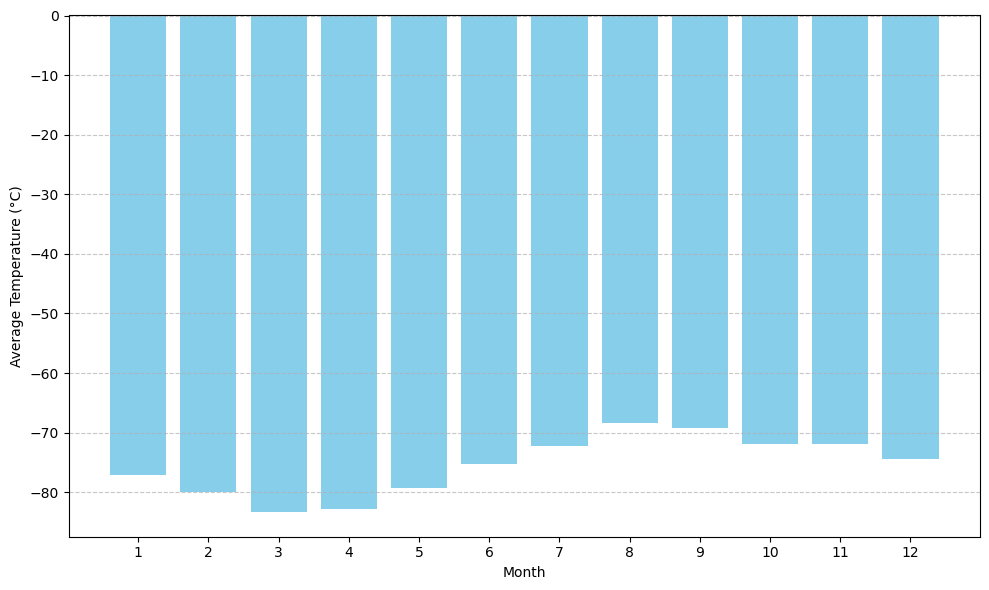

In [15]:
# Plot the average temperature by month

mar_temp = average_low_temp_by_month

mar_temp = mars_df.groupby('month')['min_temp'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(mar_temp.index, mar_temp.values, color='skyblue')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')


# Customize the x-axis labels to match your format (1, 2, 3, ..., 12)
plt.xticks(range(1, 13))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

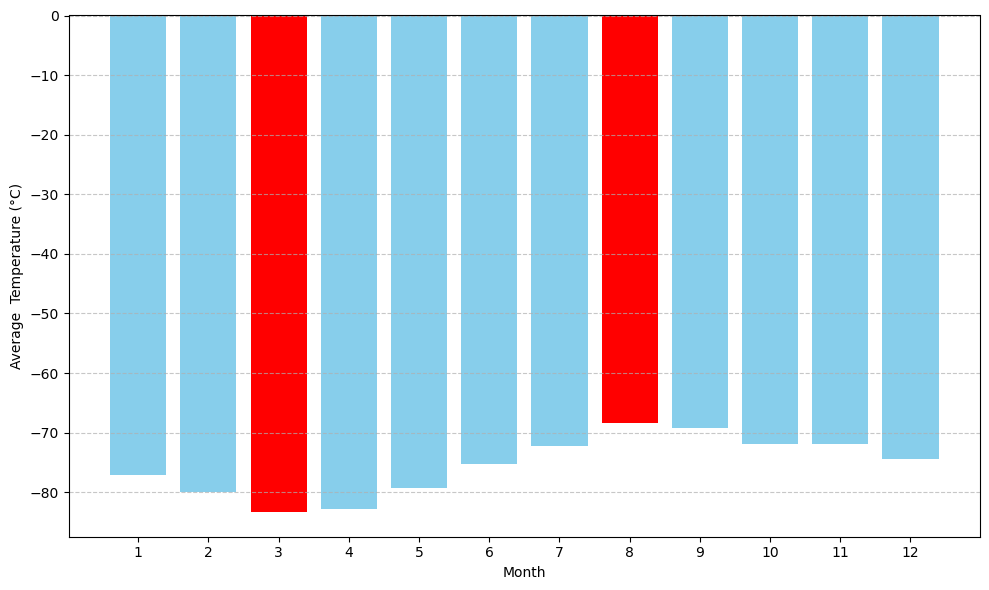

In [16]:
# Identify the coldest and hottest months in Curiosity's location
mar_temp = mars_df.groupby('month')['min_temp'].mean()

plt.figure(figsize=(10, 6))

coldest_month = mar_temp.idxmin()
hottest_month = mar_temp.idxmax()


colors = ['skyblue' if month != coldest_month and month != hottest_month else 'red' for month in mar_temp.index]

plt.bar(mar_temp.index, mar_temp.values, color=colors)


plt.xlabel('Month')
plt.ylabel('Average  Temperature (°C)')



plt.xticks(range(1, 13))


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


In [17]:
# 4. Average pressure by Martian month
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


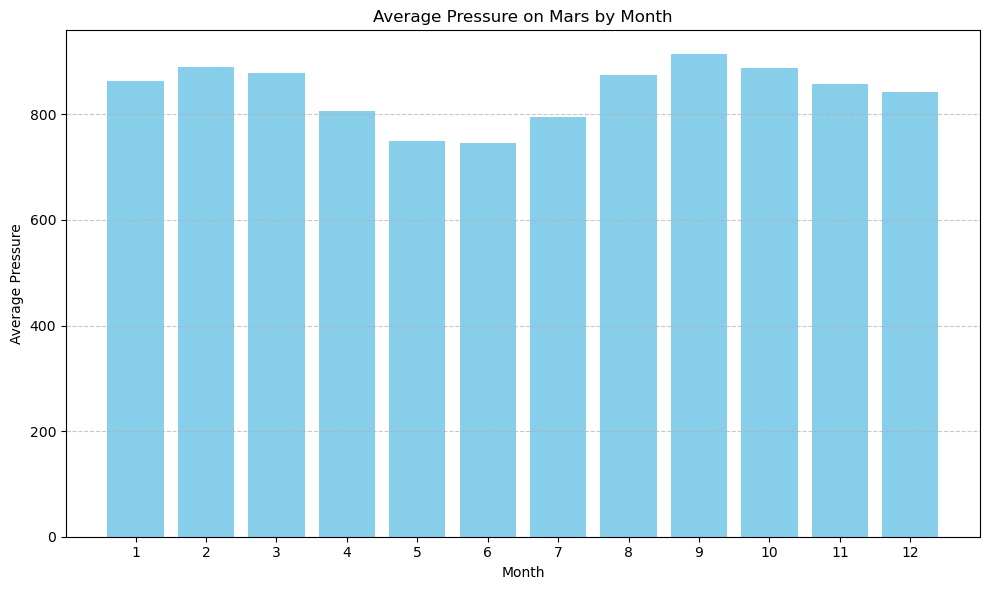

In [18]:
# Plot the average pressure by month

average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()


plt.figure(figsize=(10, 6))
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color='skyblue')


plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure on Mars by Month')


plt.xticks(range(1, 13))


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?

martian_year_sols = mars_df['sol'].nunique()


martian_sols_to_earth_days = 687  # Approximately 687 sols in a Martian year


terrestrial_days_in_martian_year = martian_year_sols * martian_sols_to_earth_days

print("Number of terrestrial (earth) days in a Martian year:", terrestrial_days_in_martian_year)

Number of terrestrial (earth) days in a Martian year: 1282629


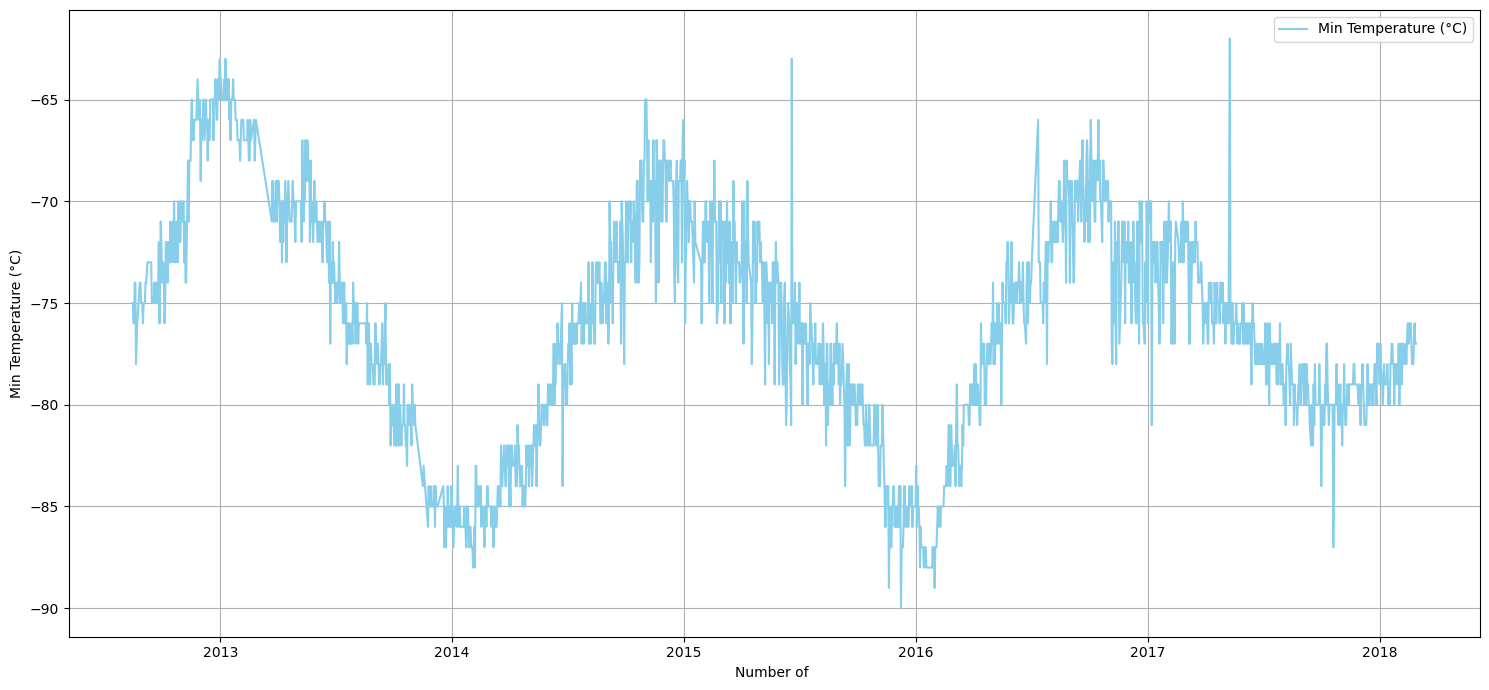

In [30]:
mar_temp = mars_df.groupby('month')['min_temp'].mean()


fig, ax = plt.subplots(figsize=[15, 7])
ax.plot(mars_df['terrestrial_date'], mars_df['min_temp'], label='Min Temperature (°C)', color='skyblue')

plt.grid(visible=True, which='both')
plt.xlabel('Number of ')
plt.ylabel('Min Temperature (°C)')

plt.legend()
plt.tight_layout()
plt.show()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [31]:
# Write the data to a CSV

csv_file_path = 'mars_data.csv'


mars_df.to_csv(csv_file_path, index=False)

print(f'Data has been successfully written to {csv_file_path}')

Data has been successfully written to mars_data.csv
